# Process the Time Series of Annual Mean and Maximum Temperature by Balancing Authority


In [1]:
# Start by importing the packages we need:
import os

import pandas as pd
import matplotlib.pyplot as plt

from glob import glob


## Set the Directory Structure

In [2]:
# Identify the data input and output directories:
data_input_dir =  '/Users/burl878/Documents/IMMM/Data/TELL/Production_Runs/tell_data/wrf_to_tell_data/'
data_output_dir =  '/Users/burl878/Documents/IMMM/Data/TELL/Analysis/BA_Temperature_Evolution/'
image_output_dir =  '/Users/burl878/Documents/IMMM/Images/TELL/Analysis/BA_Temperature_Evolution/'


## Process the Data

In [3]:
# Define a function to process the annual mean and maximum temperature time series:
def process_ba_temperature_time_series(directory: str, scenario: str):
    # Create a list of all county meteorology files in the input directory:
    list_of_files = glob(os.path.join(directory, '*.csv'))
    
    #Initiate a counter to store the results:
    counter = 0;
    output_df = pd.DataFrame()
    
    # Loop over that list process each file:
    for file in range(len(list_of_files)):
        # Iterate the counter by one:
        counter = counter + 1
            
        # Extract the BA code from the list:
        ba =  list_of_files[file].rsplit('/', 1)[1].split('_', 1)[0]
        year =  list_of_files[file].rsplit('/', 1)[1].rsplit('_', 1)[1].replace(".csv", "")
    
        # Read in the .csv file:
        met_df = pd.read_csv(list_of_files[file])
    
        # Set the time variable as an index:
        met_df.index = pd.to_datetime(met_df['Time_UTC'])
        
        # Convert the temperature from Kelvin to Fahrenheit:
        met_df['T2'] = (1.8 * (met_df['T2'] - 273)) + 32
    
        # Add the hottest and coldest times to the output file:
        output_df.loc[counter, 'BA'] = ba
        output_df.loc[counter, 'Year'] = year
        output_df.loc[counter, 'Scenario'] = scenario
        output_df.loc[counter, 'Mean_Temp_F'] = met_df['T2'].mean().round(2)
        output_df.loc[counter, 'Coldest_Hour_UTC'] = met_df['Time_UTC'].loc[met_df['T2'].idxmin()]
        output_df.loc[counter, 'Coldest_Temp_F'] = met_df['T2'].min().round(2)
        output_df.loc[counter, 'Hottest_Hour_UTC'] = met_df['Time_UTC'].loc[met_df['T2'].idxmax()]
        output_df.loc[counter, 'Hottest_Temp_F'] = met_df['T2'].max().round(2)
        
        # Clean up and move to the next year:
        del met_df, ba, year
        
    return output_df


In [4]:
# Define a function to process the annual mean and maximum temperature time series:
def process_all_bas_all_scenarios(data_input_dir: str, data_output_dir: str):
        
    # Process the historic data:
    directory = (data_input_dir + '/historic/')
    scenario = 'historic'
    historic_df = process_ba_temperature_time_series(directory = directory, scenario = scenario)
    
    # Process the future data for rcp45cooler_ssp3:
    directory = (data_input_dir + '/rcp45cooler_ssp3/')
    scenario = 'rcp45cooler_ssp3'
    rcp45cooler_ssp3 = process_ba_temperature_time_series(directory = directory, scenario = scenario)
    
    # Process the future data for rcp45cooler_ssp5:
    directory = (data_input_dir + '/rcp45cooler_ssp5/')
    scenario = 'rcp45cooler_ssp5'
    rcp45cooler_ssp5 = process_ba_temperature_time_series(directory = directory, scenario = scenario)
    
    # Process the future data for rcp45hotter_ssp3:
    directory = (data_input_dir + '/rcp45hotter_ssp3/')
    scenario = 'rcp45hotter_ssp3'
    rcp45hotter_ssp3 = process_ba_temperature_time_series(directory = directory, scenario = scenario)
    
    # Process the future data for rcp45hotter_ssp5:
    directory = (data_input_dir + '/rcp45hotter_ssp5/')
    scenario = 'rcp45hotter_ssp5'
    rcp45hotter_ssp5 = process_ba_temperature_time_series(directory = directory, scenario = scenario)
    
    # Process the future data for rcp85cooler_ssp3:
    directory = (data_input_dir + '/rcp85cooler_ssp3/')
    scenario = 'rcp85cooler_ssp3'
    rcp85cooler_ssp3 = process_ba_temperature_time_series(directory = directory, scenario = scenario)
    
    # Process the future data for rcp85cooler_ssp5:
    directory = (data_input_dir + '/rcp85cooler_ssp5/')
    scenario = 'rcp85cooler_ssp5'
    rcp85cooler_ssp5 = process_ba_temperature_time_series(directory = directory, scenario = scenario)
    
    # Process the future data for rcp85hotter_ssp3:
    directory = (data_input_dir + '/rcp85hotter_ssp3/')
    scenario = 'rcp85hotter_ssp3'
    rcp85hotter_ssp3 = process_ba_temperature_time_series(directory = directory, scenario = scenario)
    
    # Process the future data for rcp85hotter_ssp5:
    directory = (data_input_dir + '/rcp85hotter_ssp5/')
    scenario = 'rcp85hotter_ssp5'
    rcp85hotter_ssp5 = process_ba_temperature_time_series(directory = directory, scenario = scenario)
    
    # Concatenate all the scenarios together:
    all_df = pd.concat([historic_df, rcp45cooler_ssp3, rcp45cooler_ssp5, rcp45hotter_ssp3, rcp45hotter_ssp3, rcp85cooler_ssp3, rcp85cooler_ssp5, rcp85hotter_ssp3, rcp85hotter_ssp3])
    
    # Sort by BA and then year:
    all_df = all_df.sort_values(['BA', 'Year'])

    # Create the ouput filename:    
    csv_output_filename = os.path.join(data_output_dir, ('BA_Temperature_Evolution.csv'))
        
    # Write out the dataframe to a .csv file:
    all_df.to_csv(csv_output_filename, sep=',', index=False)
    
    return all_df


In [19]:
# Define a function to plot the annual mean and maximum temperature time series:
def plot_ba_temperature_time_series(data_input_dir: str, data_output_dir: str, image_output_dir: str, ba_to_plot: str):
    
    # Check to see if the aggregate file exist and if not then create it:
    if os.path.exists(os.path.join(data_output_dir, ('BA_Temperature_Evolution.csv'))) == False:
       all_df = process_all_bas_all_scenarios(data_input_dir = data_input_dir, data_output_dir = data_output_dir)
    else:
       # Read in the .aggregate file:
       all_df = pd.read_csv(os.path.join(data_output_dir, ('BA_Temperature_Evolution.csv')))
    
    # Subset to just the data for the interconnection being processed:
    ba_df = all_df.loc[all_df['BA'] == ba_to_plot]
    
    # Convert the year variable to an integrer:
    ba_df['Year'] = ba_df['Year'].astype(int)
    
    # Subset to just the first 40 future years
    # ba_df = ba_df.loc[ba_df['Year'] <= 2059] 
    
    # Subset to the time series for each scenario:
    historic_df = ba_df[ba_df['Scenario'].isin(['historic'])]
    rcp45cooler_ssp3_df = ba_df[ba_df['Scenario'].isin(['rcp45cooler_ssp3'])]
    rcp45cooler_ssp5_df = ba_df[ba_df['Scenario'].isin(['rcp45cooler_ssp5'])]
    rcp45hotter_ssp3_df = ba_df[ba_df['Scenario'].isin(['rcp45hotter_ssp3'])]
    rcp45hotter_ssp5_df = ba_df[ba_df['Scenario'].isin(['rcp45hotter_ssp5'])]
    rcp85cooler_ssp3_df = ba_df[ba_df['Scenario'].isin(['rcp85cooler_ssp3'])]
    rcp85cooler_ssp5_df = ba_df[ba_df['Scenario'].isin(['rcp85cooler_ssp5'])]
    rcp85hotter_ssp3_df = ba_df[ba_df['Scenario'].isin(['rcp85hotter_ssp3'])]
    rcp85hotter_ssp5_df = ba_df[ba_df['Scenario'].isin(['rcp85hotter_ssp5'])]
    
    # Make the plot:
    plt.figure(figsize=(25, 20))
    plt.rcParams['font.size'] = 24
    
    plt.subplot(2,1,1)
    plt.plot(historic_df['Year'], historic_df['Mean_Temp_F'], color='black', linestyle='-', label='historic', linewidth=2)
    plt.plot(rcp45cooler_ssp3_df['Year'], rcp45cooler_ssp3_df['Mean_Temp_F'], color='blue', linestyle='-', label='rcp45cooler', linewidth=2)
    plt.plot(rcp45hotter_ssp3_df['Year'], rcp45hotter_ssp3_df['Mean_Temp_F'], color='cyan', linestyle='-', label='rcp45hotter', linewidth=2)
    plt.plot(rcp85cooler_ssp3_df['Year'], rcp85cooler_ssp3_df['Mean_Temp_F'], color='orange', linestyle='-', label='rcp85cooler', linewidth=2)
    plt.plot(rcp85hotter_ssp3_df['Year'], rcp85hotter_ssp3_df['Mean_Temp_F'], color='red', linestyle='-', label='rcp85hotter', linewidth=2)
    plt.xlim([1980, 2100])
    plt.xticks([1980, 1990, 2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100])
    plt.ylim([43, 63])
    plt.legend(loc='upper left', prop={'size': 24})
    plt.ylabel('Annual Mean Temperature [$^\circ$F]')
    plt.title(('Annual Mean Temperature Projections in ' + ba_to_plot))
    
    plt.subplot(2,1,2)
    plt.plot(historic_df['Year'], historic_df['Hottest_Temp_F'], color='black', linestyle='-', label='historic', linewidth=2)
    plt.plot(rcp45cooler_ssp3_df['Year'], rcp45cooler_ssp3_df['Hottest_Temp_F'], color='blue', linestyle='-', label='rcp45cooler', linewidth=2)
    plt.plot(rcp45hotter_ssp3_df['Year'], rcp45hotter_ssp3_df['Hottest_Temp_F'], color='cyan', linestyle='-', label='rcp45hotter', linewidth=2)
    plt.plot(rcp85cooler_ssp3_df['Year'], rcp85cooler_ssp3_df['Hottest_Temp_F'], color='orange', linestyle='-', label='rcp85cooler', linewidth=2)
    plt.plot(rcp85hotter_ssp3_df['Year'], rcp85hotter_ssp3_df['Hottest_Temp_F'], color='red', linestyle='-', label='rcp85hotter', linewidth=2)
    plt.xlim([1980, 2100])
    plt.xticks([1980, 1990, 2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100])
    plt.ylim([80, 110])
    plt.legend(loc='upper left', prop={'size': 24})
    plt.ylabel('Annual Maximum Temperature [$^\circ$F]')
    plt.title(('Annual Maximum Temperature Projections in ' + ba_to_plot))

    filename = (ba_to_plot + '_Temperature_Projections_C.png')
    plt.savefig(os.path.join(image_output_dir, filename), dpi=300, bbox_inches='tight', facecolor='white')


/var/folders/tw/332pg48n0cb0jrl9_s87l48m0000gn/T/ipykernel_71031/1997744267.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_df['Year'] = ba_df['Year'].astype(int)


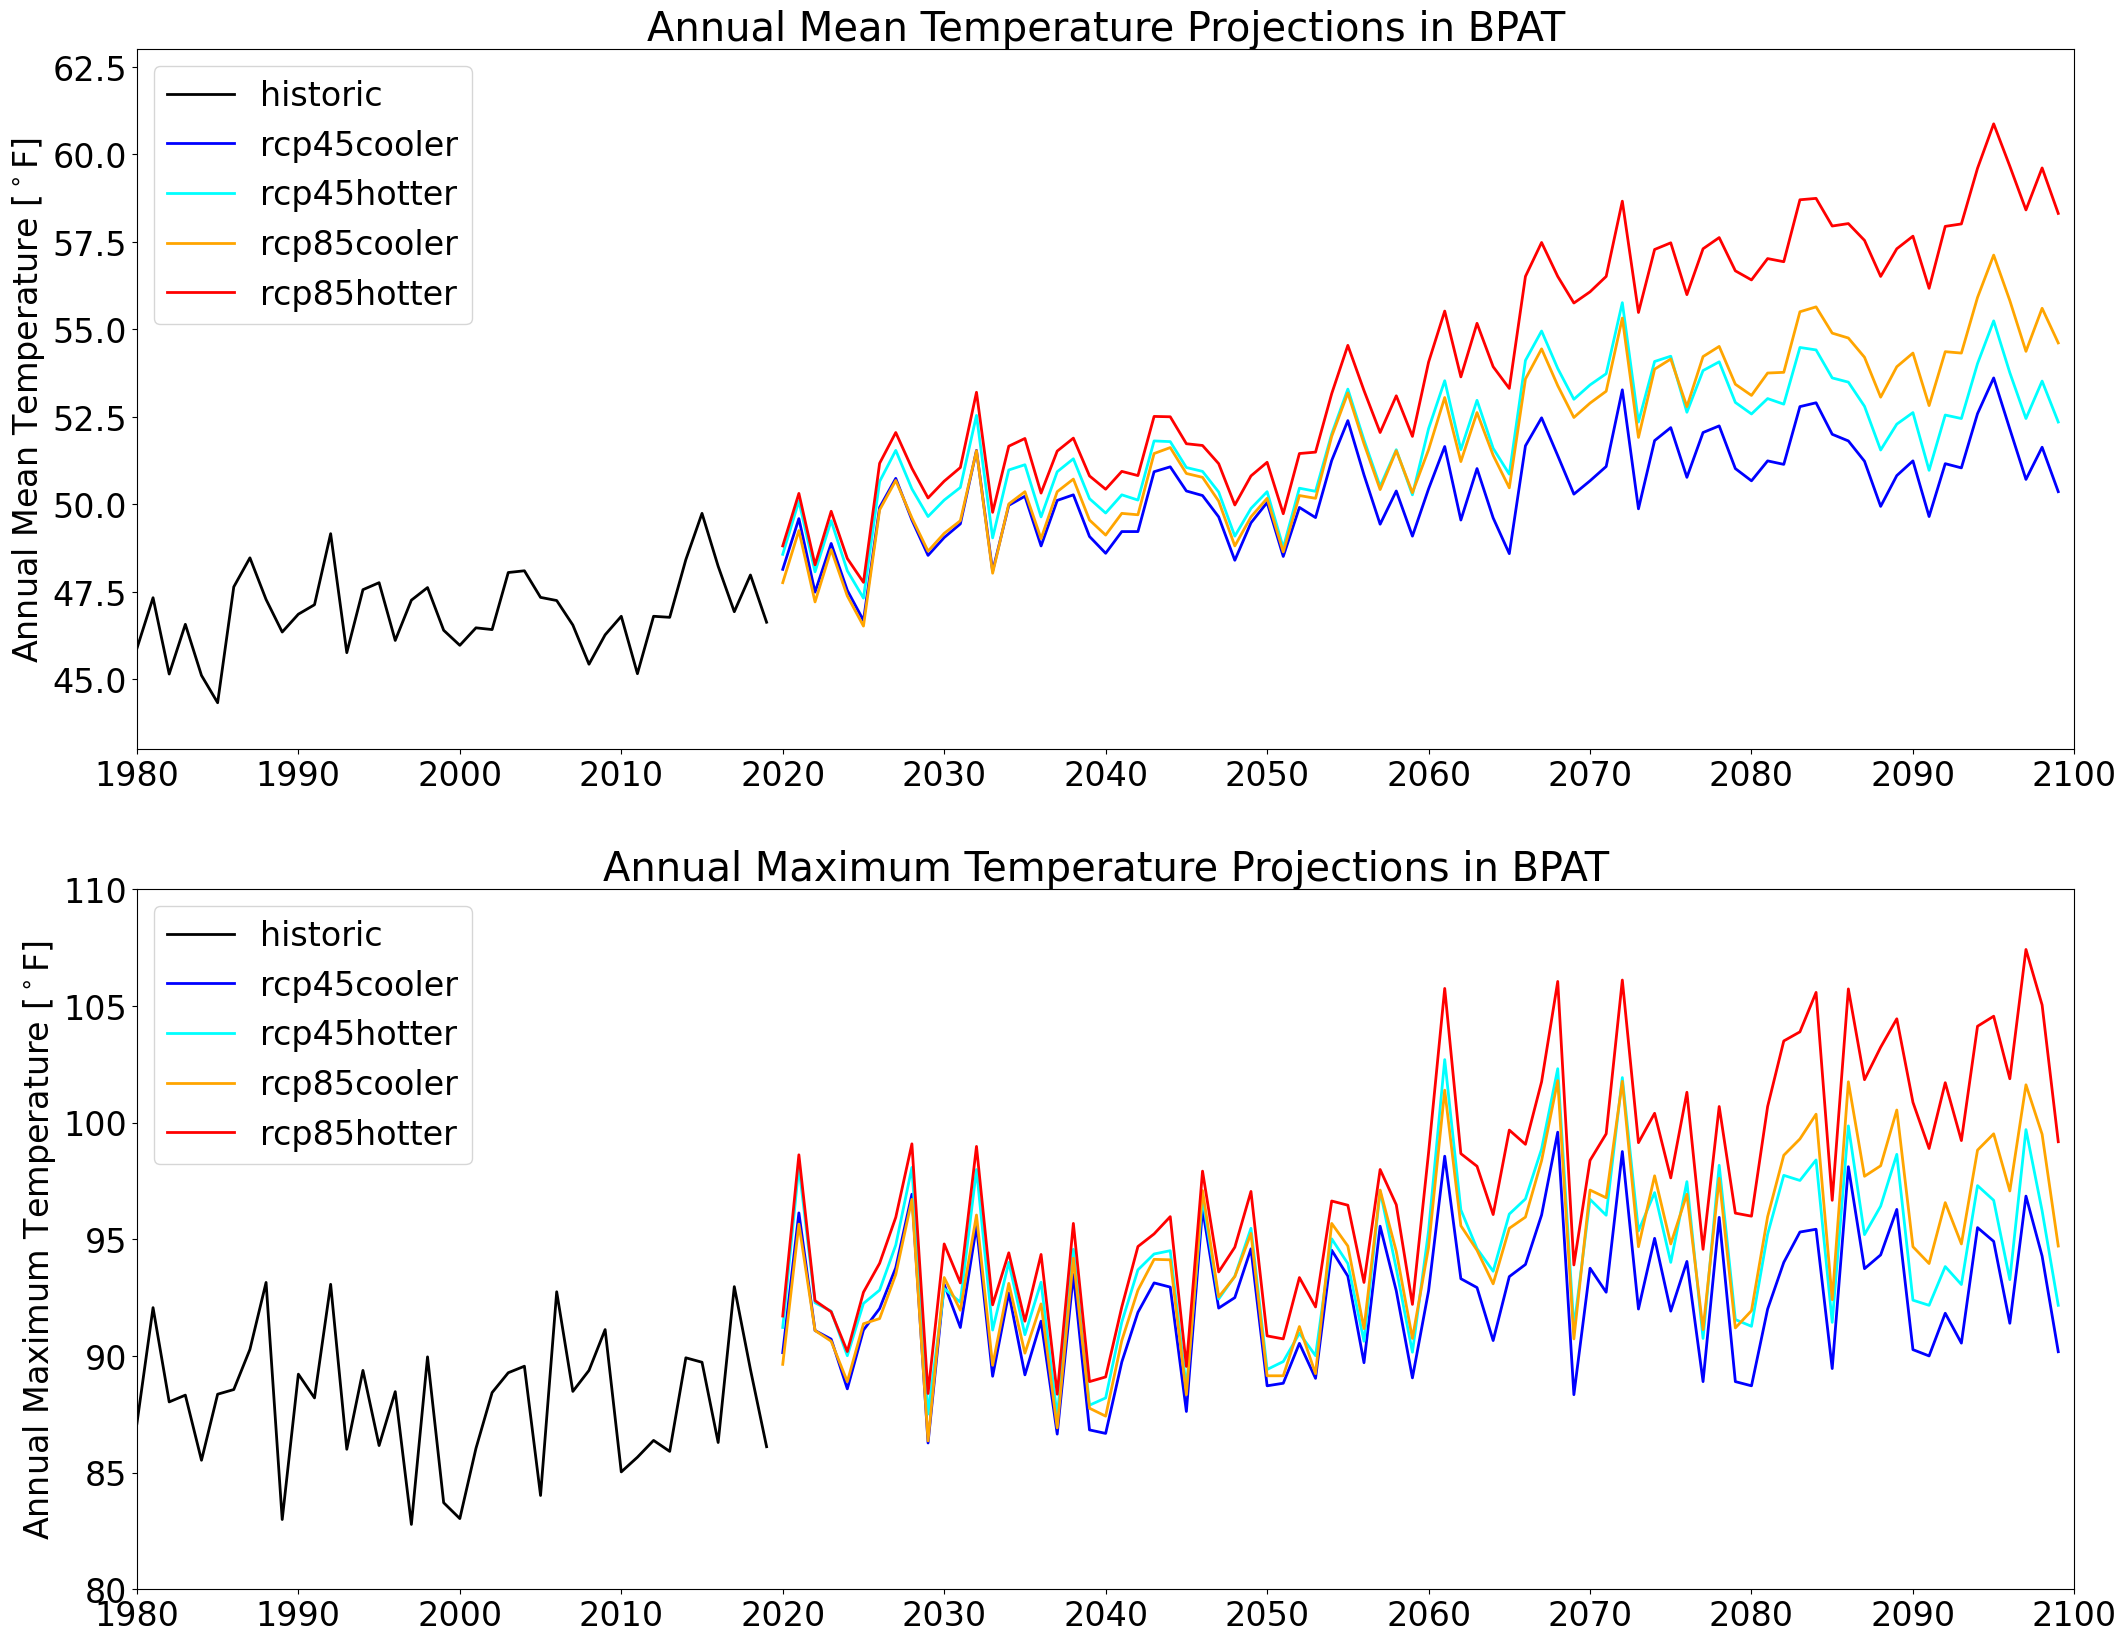

In [20]:
plot_ba_temperature_time_series(data_input_dir = data_input_dir, 
                                data_output_dir = data_output_dir,
                                image_output_dir = image_output_dir,
                                ba_to_plot = 'BPAT')
